# E-Commerce Customer Churn

## Bussiness Problem Understanding

#### Overview

Churn rate adalah rasio pelanggan yang berhenti berlangganan dengan perusahaan dalam periode waktu tertentu. Salah satu mekanisme terbaik untuk mempertahankan pelanggan saat ini adalah mengidentifikasi potensi churn dan merespons dengan cepat untuk mencegahnya. Mendeteksi tanda-tanda awal dari potensi churn, mengenali apa yang dicari pelanggan melalui pergerakan, dan meningkatkan pelayanan untuk meningkatkan kepuasan para customer sangat penting untuk mempertahankan bisnis di era persaingan ini. Perusahaan E-Commerce biasanya memiliki volume besar data yang berkaitan dengan pelanggan mereka yang sudah ada seperti riwayat transaksi, riwayat pencarian, periodisitas pembelian, dan lain-lain. Teknik data mining dapat diterapkan untuk menganalisis perilaku pelanggan dan untuk memprediksi pengurangan pelanggan potensial sehingga strategi pemasaran khusus dapat diadopsi untuk mempertahankannya.

#### Problem Statement
Mempertimbangkan tingkat persaingan yang berlaku di domain E-Commerce Business-to-Consumer (B2C) sehingga diperlukan strategi dan penawaran khusus yang ditujukan untuk menarik pelanggan baru serta fokus untuk mengurangi tingkat churn pelanggan. Pelanggan yang sudah loyal bukan tidak mungkin untuk meninggalkan layanan apabila memang ada pesaing baru yang lebih baik. Karena itu perusahaan harus bisa memberikan pelayanan yang bisa membuat pelanggan yang sudah loyal tidak berpaling ke layanan lainnya, agar perusahaan tidak mengalami kerugian.

#### Goals
Sebuah perusahaan ingin memprediksi pelanggan mana yang loyal dan akan churn berdasankan variabel data yang telah dikumpulkan. Hal ini sejalan untuk meningkatkan potensi keuntungan yang akan diperoleh perusahaan. Dengan menggunakan pendekatan model machine learning yang akan dibangun yang nantinya akan digunakan sebagai tools untuk memprediksi tingkat churn pelanggan.

#### Analytic Approach
Analitik yang dilakukan berupa evaluasi dan implementasi model klasifikasi untuk memprediksi tingkat churn suatu pelanggan dengan memanfaatkan data yang telah dikumpulkan.

#### Metrics Evaluation
0 : Pelanggan tidak churn,
1 : Pelanggan Churn

Type 1 error : False Positive Konsekuensi : Mengeluarkan uang yang sia-sia untuk pelanggan yang tidak akan churn,
Type 2 error : False Negative Konsekuensi : Kehilangan pelanggan yang sudah loyal

## Data Understanding

In [265]:
# DataFrame Library
import pandas as pd
import numpy as np

# Visualization Library
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

# Feature Engineering or Preprocessing Library
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import RandomUnderSampler


# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, BaggingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier

# Metrics Evaluation
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix


# Ignore Warning
import warnings
warnings.filterwarnings("ignore")

In [121]:
df = pd.read_csv('data_ecommerce_customer_churn.csv')
df_raw = df.copy()
df.head(5)

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB




Didalam dataset ini terdapat 3941 baris data, dan 11 kolom.
Dari 11 kolom tersebut terdapat 9 kolom numerik, dan 2 kolom kategorik.

Kolom Numerik:
- Tenure: Masa penggunaan pelanggan dalam bulan.
- WarehouseToHome: Jarak antara gudang dengan rumah pelanggan.
- NumberOfDeviceRegistered: Jumlah perangkat pelanggan yang terhubung ke pelayanan.
- SatisfactionScore: Tingkat kepuasan pelanggan terhadap pelayanan.
- NumberOfAddress: Jumlah alamat pelanggan yang terdaftar di pelayanan.
- Complain: Pengajuan komplain pelanggan ke pelayanan.
- DaySinceLastOrder: Hari sejak pemesanan terakhir oleh pelanggan.
- CashbackAmount: Rata-rata cashback bulan lalu.
- Churn: 0 : Tidak churn, 1 : churn.

Kolom Kategorik:
- PreferedOrderCat: Kategori yang disukai oleh pelanggan.
- MaritalStatus: Status pernikahan pelanggan.


In [123]:
display(df.describe().T, df.describe(include='object').T)

,count,mean,std,min,25%,50%,75%,max
Tenure,3747.0,10.081398,8.498864,0.0,2.0,9.00,16.00,61.00
WarehouseToHome,3772.0,15.650583,8.452301,5.0,9.0,14.00,21.00,127.00
NumberOfDeviceRegistered,3941.0,3.679269,1.013938,1.0,3.0,4.00,4.00,6.00
SatisfactionScore,3941.0,3.088302,1.381832,1.0,2.0,3.00,4.00,5.00
NumberOfAddress,3941.0,4.237757,2.626699,1.0,2.0,3.00,6.00,22.00
Complain,3941.0,0.282416,0.450232,0.0,0.0,0.00,1.00,1.00
DaySinceLastOrder,3728.0,4.531652,3.667648,0.0,2.0,3.00,7.00,46.00
CashbackAmount,3941.0,176.707419,48.791784,0.0,145.7,163.34,195.25,324.99
Churn,3941.0,0.171023,0.376576,0.0,0.0,0.00,0.00,1.00


,count,unique,top,freq
PreferedOrderCat,3941,6,Laptop & Accessory,1458
MaritalStatus,3941,3,Married,2055


## Data Cleaning

In [124]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['Data Features', 'Data Type', 'Null Count', 'Null Count (%)', 'Unique', 'Unique Sample'],
                     data=listItem)
dfDesc

,Data Features,Data Type,Null Count,Null Count (%),Unique,Unique Sample
0,Tenure,float64,194,4.92,36,"[25.0, 7.0]"
1,WarehouseToHome,float64,169,4.29,33,"[32.0, 34.0]"
2,NumberOfDeviceRegistered,int64,0,0.00,6,"[2, 3]"
3,PreferedOrderCat,object,0,0.00,6,"[Mobile Phone, Laptop & Accessory]"
4,SatisfactionScore,int64,0,0.00,5,"[1, 2]"
5,MaritalStatus,object,0,0.00,3,"[Single, Divorced]"
6,NumberOfAddress,int64,0,0.00,14,"[19, 3]"
7,Complain,int64,0,0.00,2,"[1, 0]"
8,DaySinceLastOrder,float64,213,5.40,22,"[0.0, 1.0]"
9,CashbackAmount,float64,0,0.00,2335,"[162.09, 192.81]"


In [125]:
df['PreferedOrderCat'].value_counts()

Laptop & Accessory    1458
Mobile Phone           887
Fashion                585
Mobile                 559
Grocery                273
Others                 179
Name: PreferedOrderCat, dtype: int64

In [126]:
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace('Mobile', 'Mobile Phone')
df['PreferedOrderCat'].value_counts()

Laptop & Accessory    1458
Mobile Phone          1446
Fashion                585
Grocery                273
Others                 179
Name: PreferedOrderCat, dtype: int64

Karena ada 2 jenis kategori yang sama yaitu Mobile & Mobile Phone, maka kedua kategori tersebut akan digabung menjadi satu.

In [127]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['Data Features', 'Data Type', 'Null Count', 'Null Count (%)', 'Unique', 'Unique Sample'],
                     data=listItem)
dfDesc

,Data Features,Data Type,Null Count,Null Count (%),Unique,Unique Sample
0,Tenure,float64,194,4.92,36,"[27.0, 31.0]"
1,WarehouseToHome,float64,169,4.29,33,"[26.0, 32.0]"
2,NumberOfDeviceRegistered,int64,0,0.00,6,"[1, 6]"
3,PreferedOrderCat,object,0,0.00,5,"[Laptop & Accessory, Fashion]"
4,SatisfactionScore,int64,0,0.00,5,"[3, 1]"
5,MaritalStatus,object,0,0.00,3,"[Single, Divorced]"
6,NumberOfAddress,int64,0,0.00,14,"[10, 2]"
7,Complain,int64,0,0.00,2,"[1, 0]"
8,DaySinceLastOrder,float64,213,5.40,22,"[5.0, 16.0]"
9,CashbackAmount,float64,0,0.00,2335,"[218.36, 172.24]"


#### Handling Missing Values

In [128]:
nullcount = df.isna().sum()
nullcountpct = round((df.isna().sum()/len(df[col])) * 100,2)
dfnull = pd.DataFrame({
    'Null Values':nullcount,
    'Percentage':nullcountpct}).reset_index()
dfnull.rename(columns={'index':'Data Features'}, inplace=True)
dfnull

,Data Features,Null Values,Percentage
0,Tenure,194,4.92
1,WarehouseToHome,169,4.29
2,NumberOfDeviceRegistered,0,0.00
3,PreferedOrderCat,0,0.00
4,SatisfactionScore,0,0.00
5,MaritalStatus,0,0.00
6,NumberOfAddress,0,0.00
7,Complain,0,0.00
8,DaySinceLastOrder,213,5.40
9,CashbackAmount,0,0.00


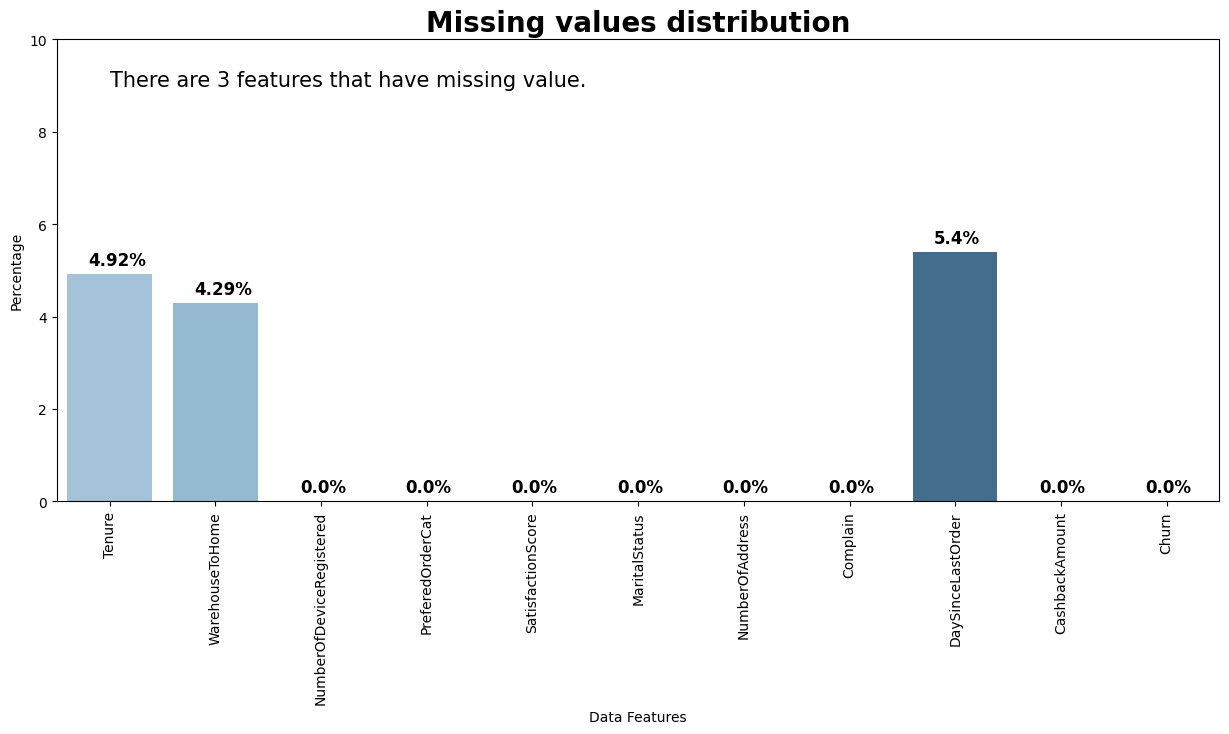

In [129]:
fig, ax = plt.subplots(figsize=(15,6))

g = sns.barplot(x = 'Data Features',y='Percentage',data=dfnull,ax=ax, 
               palette=sns.color_palette("Blues_d", n_colors=13, desat=1))

# percentage of missing values
x = np.arange(len(dfnull['Data Features']))
y = dfnull['Percentage']

for i, v in enumerate(y):
    ax.text(x[i]-0.2, v+0.2, str(v)+'%', fontsize = 12, color='black', fontweight='bold')
    
text = 'There are 3 features that have missing value.'

ax.text(0,9,text,horizontalalignment='left',color='black',fontsize=15, fontweight='normal')
ax.set_title('Missing values distribution', color='black', fontsize=20, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_ylim(0, 10)
plt.show()

<AxesSubplot: >

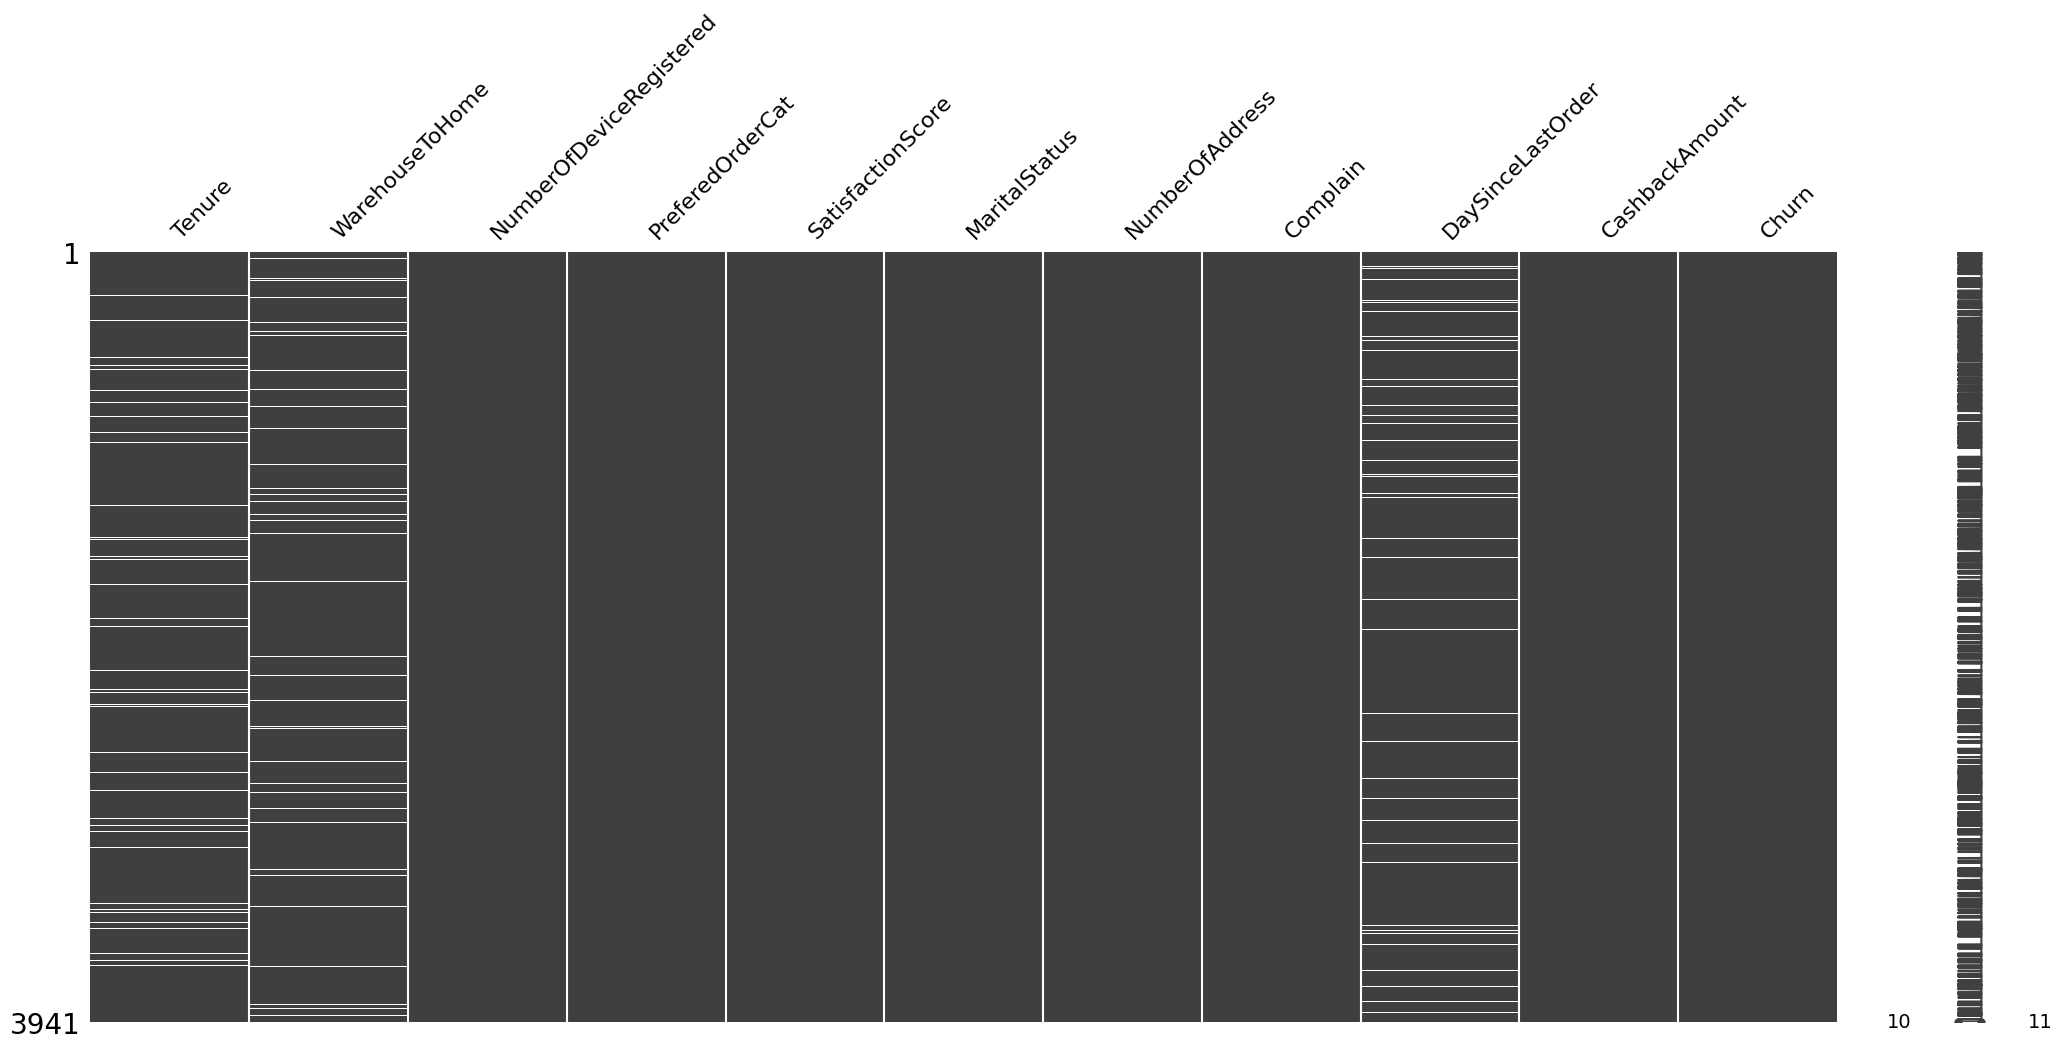

In [130]:
msno.matrix(df)

Index(['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'SatisfactionScore', 'NumberOfAddress', 'Complain', 'DaySinceLastOrder',
       'CashbackAmount', 'Churn'],
      dtype='object')

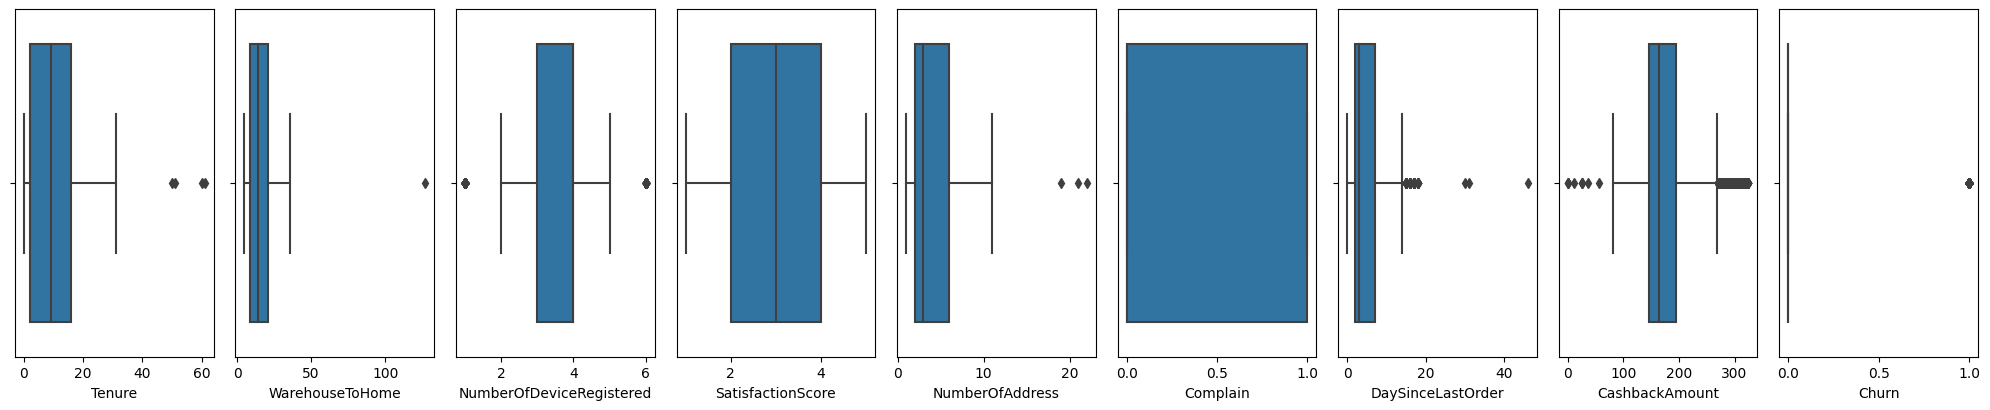

In [131]:
# Cek Outlier Menggunakan Boxplot
num = df.select_dtypes(exclude=object).columns

plt.figure(figsize=(20,20))
for i in range(0,len(num)):
    plt.subplot(5,len(num),i+1)
    sns.boxplot(data=df,x=df[num[i]])
    plt.tight_layout();
num

Missing value pada data hanya terdapat pada data yang memiliki kategori numerik, untuk missing value handling akan dibandingkan menggunakan SimpleImputer menggunakan nilai median karna terdapat banyak outliers pada data.

In [132]:
simple_impute = SimpleImputer(strategy ='median')
df[['Tenure','WarehouseToHome','DaySinceLastOrder']] = simple_impute.fit_transform(df[['Tenure','WarehouseToHome','DaySinceLastOrder']])

In [133]:
df.isna().sum()

Tenure                      0
WarehouseToHome             0
NumberOfDeviceRegistered    0
PreferedOrderCat            0
SatisfactionScore           0
MaritalStatus               0
NumberOfAddress             0
Complain                    0
DaySinceLastOrder           0
CashbackAmount              0
Churn                       0
dtype: int64

#### Handling Duplicate Data

In [134]:
display(df[df.duplicated(subset=None)].count())

Tenure                      673
WarehouseToHome             673
NumberOfDeviceRegistered    673
PreferedOrderCat            673
SatisfactionScore           673
MaritalStatus               673
NumberOfAddress             673
Complain                    673
DaySinceLastOrder           673
CashbackAmount              673
Churn                       673
dtype: int64

In [135]:
no_duplicate = df.copy()
no_duplicate = df.drop_duplicates(subset=None, keep='first').reset_index(drop=True)

print(f'Data sebelum duplikat dihapus: {df.shape}')
print(f'Data setelah duplikat dihapus: {no_duplicate.shape}')

Data sebelum duplikat dihapus: (3941, 11)
Data setelah duplikat dihapus: (3268, 11)


In [136]:
df = no_duplicate.copy()
df.duplicated().sum()

0

#### Features Distribution

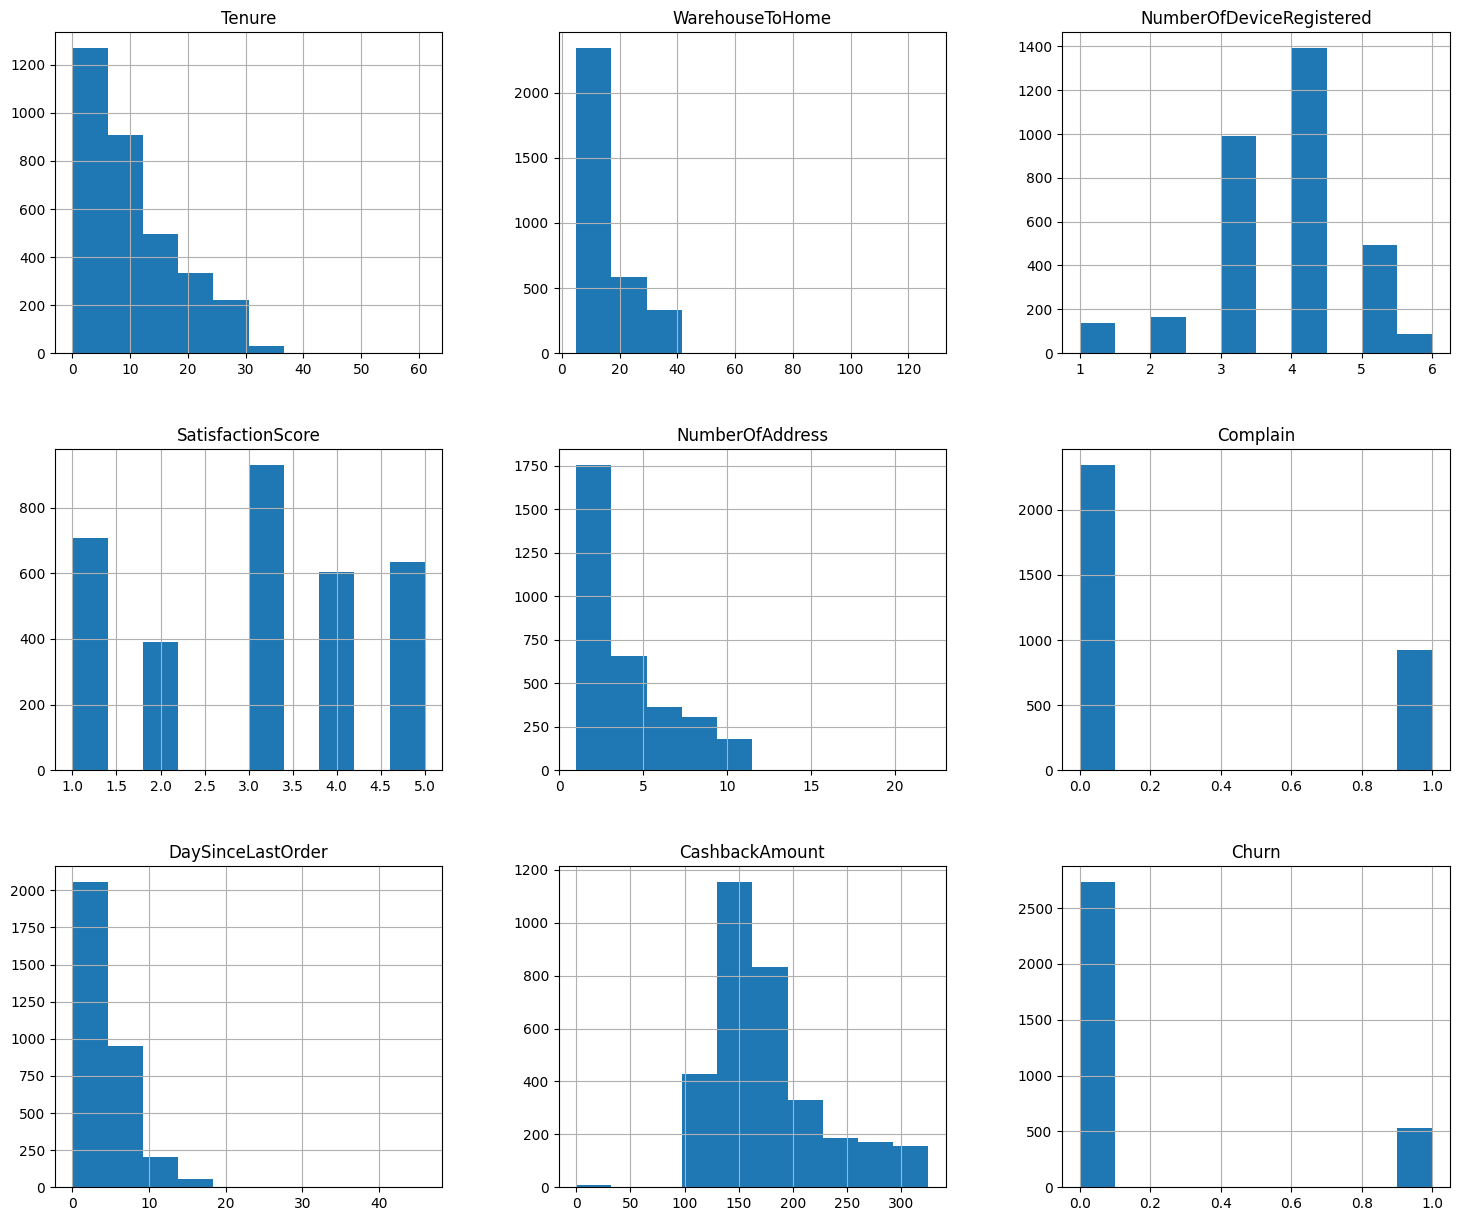

In [137]:
df.hist(bins=10,figsize=(18,15));

Karena banyak features yang seharunya bertipe data integer, maka lakukan converting data type.

In [138]:
df['Tenure'] = df['Tenure'].astype('int64')
df['WarehouseToHome'] = df['WarehouseToHome'].astype('int64')
df['DaySinceLastOrder'] = df['DaySinceLastOrder'].astype('int64')

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3268 entries, 0 to 3267
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3268 non-null   int64  
 1   WarehouseToHome           3268 non-null   int64  
 2   NumberOfDeviceRegistered  3268 non-null   int64  
 3   PreferedOrderCat          3268 non-null   object 
 4   SatisfactionScore         3268 non-null   int64  
 5   MaritalStatus             3268 non-null   object 
 6   NumberOfAddress           3268 non-null   int64  
 7   Complain                  3268 non-null   int64  
 8   DaySinceLastOrder         3268 non-null   int64  
 9   CashbackAmount            3268 non-null   float64
 10  Churn                     3268 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 281.0+ KB


#### Handling Outliers

Index(['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'SatisfactionScore', 'NumberOfAddress', 'Complain', 'DaySinceLastOrder',
       'CashbackAmount', 'Churn'],
      dtype='object')

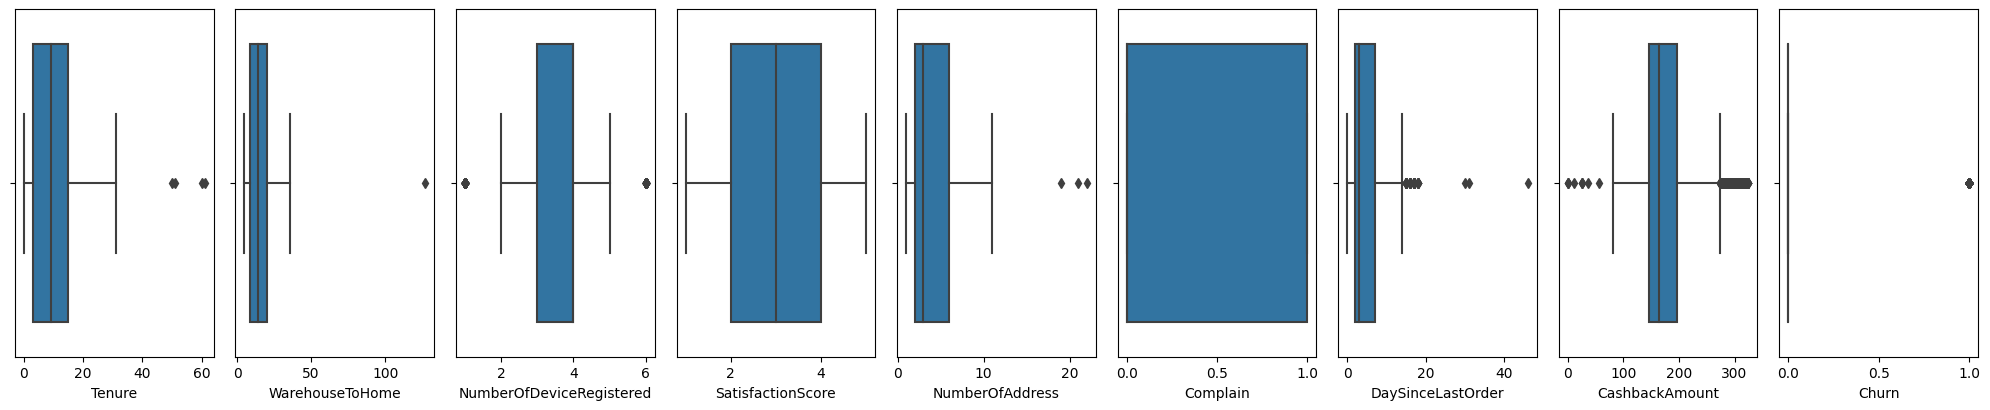

In [140]:
# Cek Outlier Menggunakan Boxplot
num = df.select_dtypes(exclude=object).columns

plt.figure(figsize=(20,20))
for i in range(0,len(num)):
    plt.subplot(5,len(num),i+1)
    sns.boxplot(data=df,x=df[num[i]])
    plt.tight_layout();
num

In [141]:
columns_outliers = ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 'NumberOfAddress', 'DaySinceLastOrder', 'CashbackAmount']

def outlier_handle(df, col):
    upper = []
    lower = []
    
#IQR
    Q1 = df.describe()[col]['25%']
    Q3 = df.describe()[col]['75%']
    min = df.describe()[col]['min']
    max = df.describe()[col]['max']
    IQR = Q3 - Q1
    upper_bound = Q3+1.5*IQR
    lower_bound = Q1-1.5*IQR
    
    print(f'Bentuk data awal: {df.shape}')
    
    if max > upper_bound:
        upper = list(np.where(df[col] >= upper_bound)[0])
    else:
        upper_bound = max
        
    if min < lower_bound:
        lower = list(np.where(df[col] <= lower_bound)[0])
    else:
        lower_bound = min

    upper.extend(lower)
    df.drop(upper, inplace = True)
    print(f'Data akhir: {df.shape}\n')
    return df.reset_index(drop=True)

df_outlier = df.copy()
for i, a in enumerate(columns_outliers):
    print(f'Kolom {a}:')
    df_outlier = outlier_handle(df_outlier, a)

Kolom Tenure:
Bentuk data awal: (3268, 11)
Data akhir: (3264, 11)

Kolom WarehouseToHome:
Bentuk data awal: (3264, 11)
Data akhir: (3263, 11)

Kolom NumberOfDeviceRegistered:
Bentuk data awal: (3263, 11)
Data akhir: (3038, 11)

Kolom NumberOfAddress:
Bentuk data awal: (3038, 11)
Data akhir: (3035, 11)

Kolom DaySinceLastOrder:
Bentuk data awal: (3035, 11)
Data akhir: (2996, 11)

Kolom CashbackAmount:
Bentuk data awal: (2996, 11)
Data akhir: (2769, 11)



In [142]:
print(f'Jumlah dataset awal : {df_raw.shape}')
print(f'Jumlah dataset tanpa data duplikat: {df.shape}')
print(f'Jumlah dataset tanpa data duplikat dan outlier: {df_outlier.shape}')

Jumlah dataset awal : (3941, 11)
Jumlah dataset tanpa data duplikat: (3268, 11)
Jumlah dataset tanpa data duplikat dan outlier: (2769, 11)


Pada keterangan diatas menunjukan bahwa raw data sebelum dilakukan data cleaning berjumlah 3941 data. Kemudian setelah dilakukan handling data duplikat, jumlah data berkurang menjadi 3268 data, lalu selanjutnya apabila dilakukan handling data outliers data akan semakin berkurang menjadi 2769 data. Dengan adanya indikasi bahwa data yang diolah berkurang banyak, hal ini nantinya akan sangat mempengaruhi hasil dari proses training dan juga testing data. Oleh karena itu, langkah yang diambil dalam pengolahan data ini yaitu **TIDAK MENGHAPUS DATA OUTLIER**.   

## Data Analysis

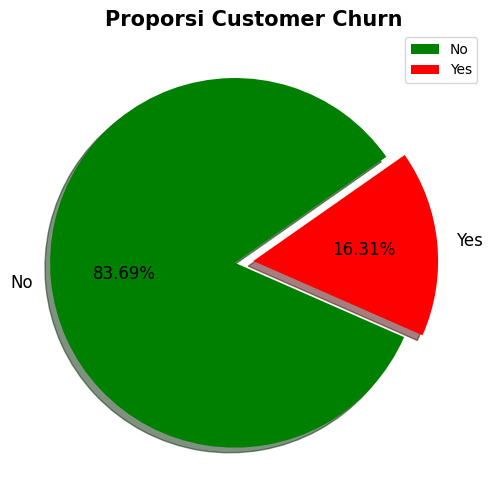

In [143]:
#check proporsi customer churn
plt.figure(figsize=(8,6))
plt.pie(
        df["Churn"].value_counts(),
        autopct='%.2f%%',
        explode=[0.1,0],
        labels=["No","Yes"], 
        shadow=True, 
        textprops={'fontsize': 12},
        colors=["Green","Red"], 
        startangle=35)

plt.title("Proporsi Customer Churn",fontsize=15, fontweight='bold', pad=2)
plt.legend(fontsize=10, loc="best")
plt.show()

In [144]:
df['Churn'].value_counts()

0    2735
1     533
Name: Churn, dtype: int64

Dari hasil data diatas dapat dilihat bahwa proporsi churn & tidak churn dengan persentase churn sebesar 16.31% sedangkan persentase tidak churn sebesar 83.69%. Dengan jumlah pelanggan churn 2735 dan tidak churn 533. Dengan proporsi ini dapat dikatakan bahwa data pelanggan ini merupakan data yang imbalance.

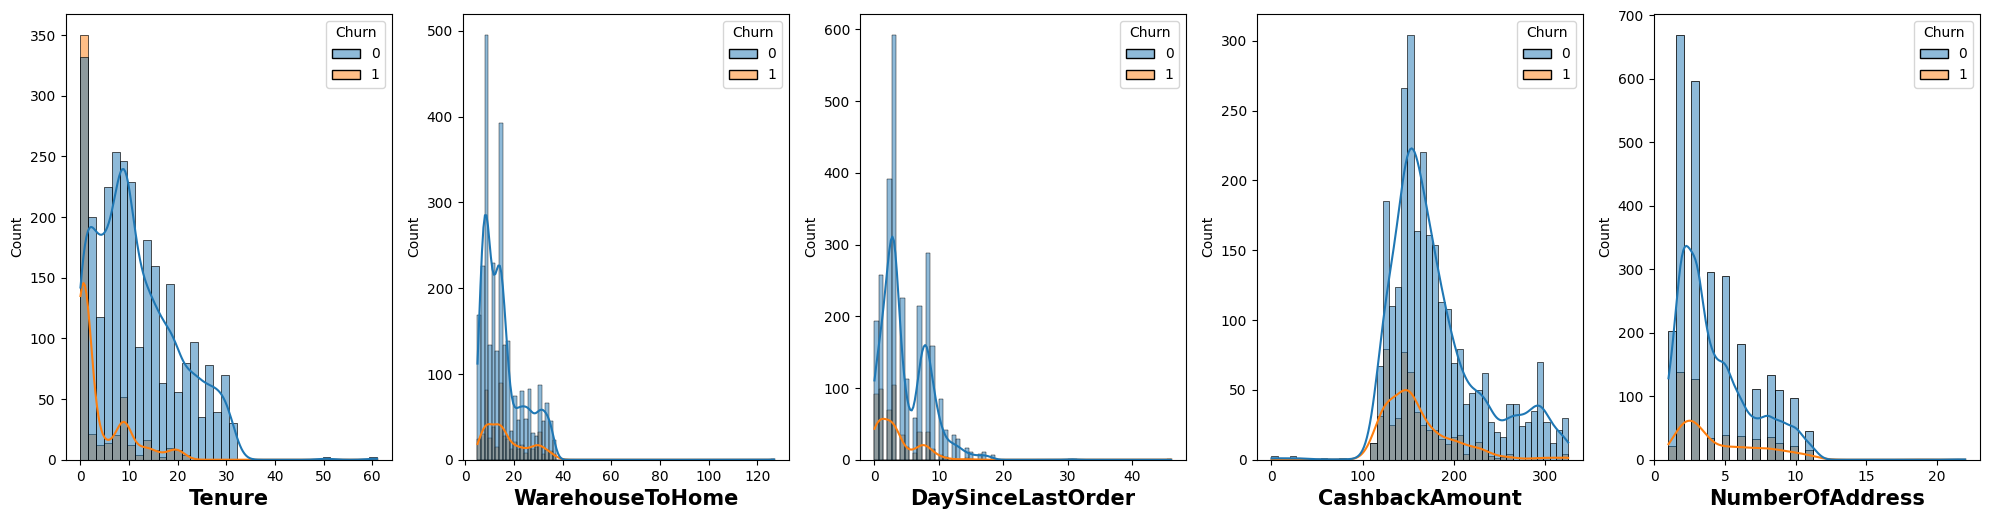

In [145]:
# Melihat pengaruh masing-masing variabel numerik terhadap churn
num = ['Tenure','WarehouseToHome','DaySinceLastOrder','CashbackAmount','NumberOfAddress']

plt.figure(figsize=(20,15))
for i in range(0,len(num)):
    plt.subplot(3,len(num),i+1)
    sns.histplot(data=df,x=df[num[i]],kde=True, hue='Churn')
    plt.xlabel(num[i], fontsize=15, fontweight='bold')
    plt.tight_layout();

- Tenure terhadap churn : Dari grafik diatas dapat dilihat bahwa, semakin lama pelanggan menggunakan layanan maka semakin banyak pelanggan untuk tidak churn.
- WarehouseToHome terhadap churn : Ketika rumah dari pelanggan semakin dekat maka kemungkinan untuk churn maupun tidak sama sama meningkat sehingga dapat dikatakan seimbang.
- DaySinceLastOrder terhadap churn : Dari grafik diatas menunjukan bahwa, data churn dan yang tidak churn terdistribusi hampir sama.
- CashbackAmount : Dari grafik diatas menunjukan bahwa, pelanggan yang churn berada pada kisaran 140-150.
- NumberOfAddress : Pelanggan churn paling tinggi adalah yang memiliki 2-3 alamat yang terdaftar dalam pelayanan.

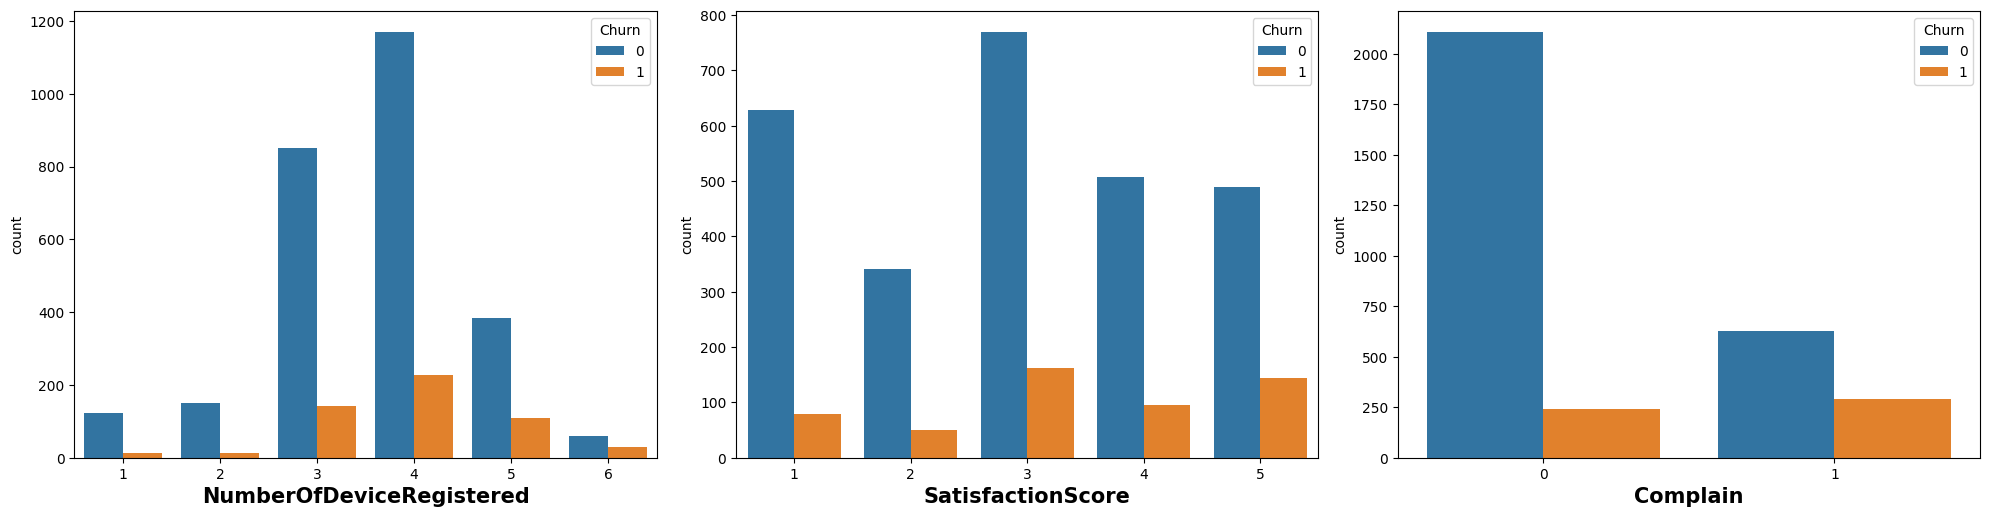

In [146]:
# Melihat pengaruh masing-masing variabel numerik terhadap churn
num2 = ['NumberOfDeviceRegistered','SatisfactionScore','Complain']

fig, plt.figure(figsize=(20,15))
for i in range(0,len(num2)):
    plt.subplot(3,len(num2),i+1)
    sns.countplot(data=df,x=num2[i], hue='Churn')
    plt.xlabel(num2[i], fontsize=15, fontweight='bold')
    plt.tight_layout();

- NumberOfDeviceRegistered : Pelanggan churn paling tinggi berada di 3-4 device yang terdaftar dalam pelayanan.
- SatisfactionScore : Tingkat kepuasan tertinggi berada pada level 3 dan 1 dimana itu artinya mereka banyak dari mereka memberikan penilaian yang buruk hingga akhirnya churn. Dapat diartikan pada level kepuasan 3 merupakan paling banyak pelanggan memberikan penilaiannya 
- Complain : Pelanggan yang cenderung churn melakukan komplain terhadap pelayanan. Akan tetepi masih ada pelanggan yang memberikan komplain akan tetapi tidak churn. Hal ini dapat dicari info lebih lanjut alasan mereka tidak churn meskipun memberikan komplain hingga akhirnya dapat diperbaiki.

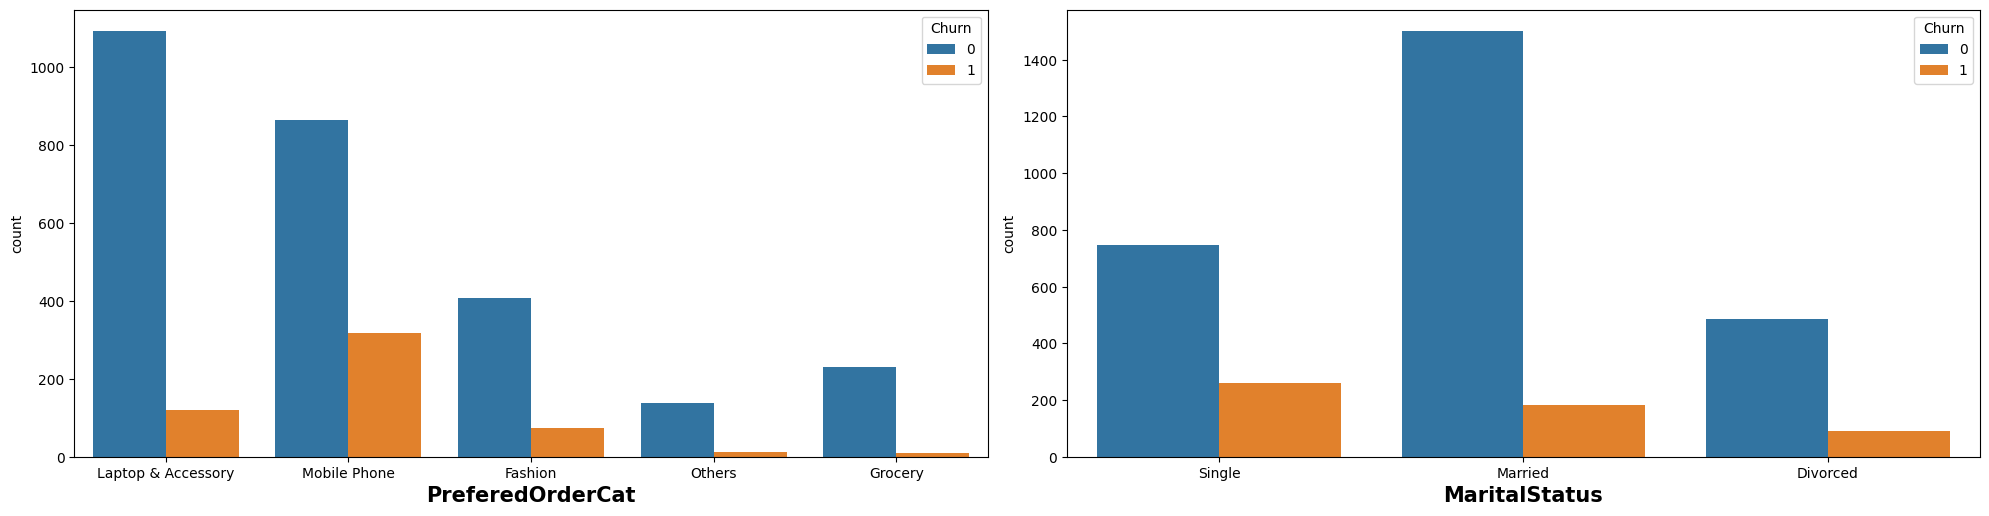

In [147]:
# Melihat pengaruh masing-masing variabel kategorik terhadap churn 
cat = df.select_dtypes('object').columns

plt.figure(figsize=(20,15))
for i in range(0,len(cat)):
    plt.subplot(3,len(cat),i+1)
    sns.countplot(data=df,x=cat[i], hue='Churn')
    plt.xlabel(cat[i], fontsize=15, fontweight='bold')
    plt.tight_layout();

- PreferedOrderCat dan Marital Status: Peralatan elektronik dan fashion merupakan paling banyak pelanggan tidak churn sehingga memungkinkan dapat dimaksimalkan untuk produk dengan kategori tersebut yang kebanyakan pelanggan masih single. Mengapa kebanyakan pelanggan single lebih banyak tidak churn, mungkin saja dengan gaya hidup yang dijalani oleh para pelanggan single lebih ingin terlihat trendy dengan fashion dan peralatan elektronik terbaru.

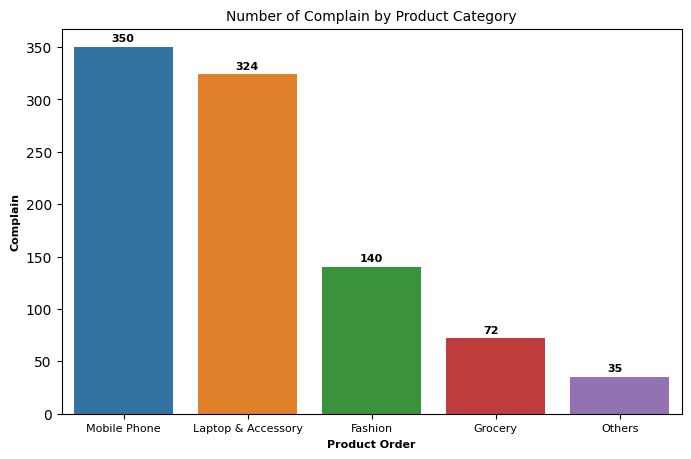

In [148]:
product_complain = df.groupby(["PreferedOrderCat"],as_index=False)["Complain"].sum().sort_values("Complain",ascending=False)

fig, ax = plt.subplots(ncols=1, figsize=(8, 5))

x = np.arange(len(product_complain['PreferedOrderCat']))
y = product_complain['Complain']
for i, v in enumerate(y):
    ax.text(x[i]-0.1, v+5, str(v), fontsize = 8, color='black', fontweight='bold')

s = sns.barplot(data=product_complain, y="Complain",x="PreferedOrderCat", ax=ax)
ax.set_title("Number of Complain by Product Category", fontsize=10)
ax.set_ylabel("Complain",fontsize=8, fontweight='bold')
ax.set_xlabel("Product Order",fontsize=8, fontweight='bold')
s.set_xticklabels(s.get_xticklabels(), fontsize=8)
plt.show()

- Inilah alasan mengapa banyaknya pelanggan yang churn pada kategori mobile phone dan laptop & accesory, hal ini dikarenakan tingginya tingkat komplain pada kategori tersebut meskipun kedua kategori tersebut juga merupakan kategori dengan banyak pelanggan yang tidak churn.

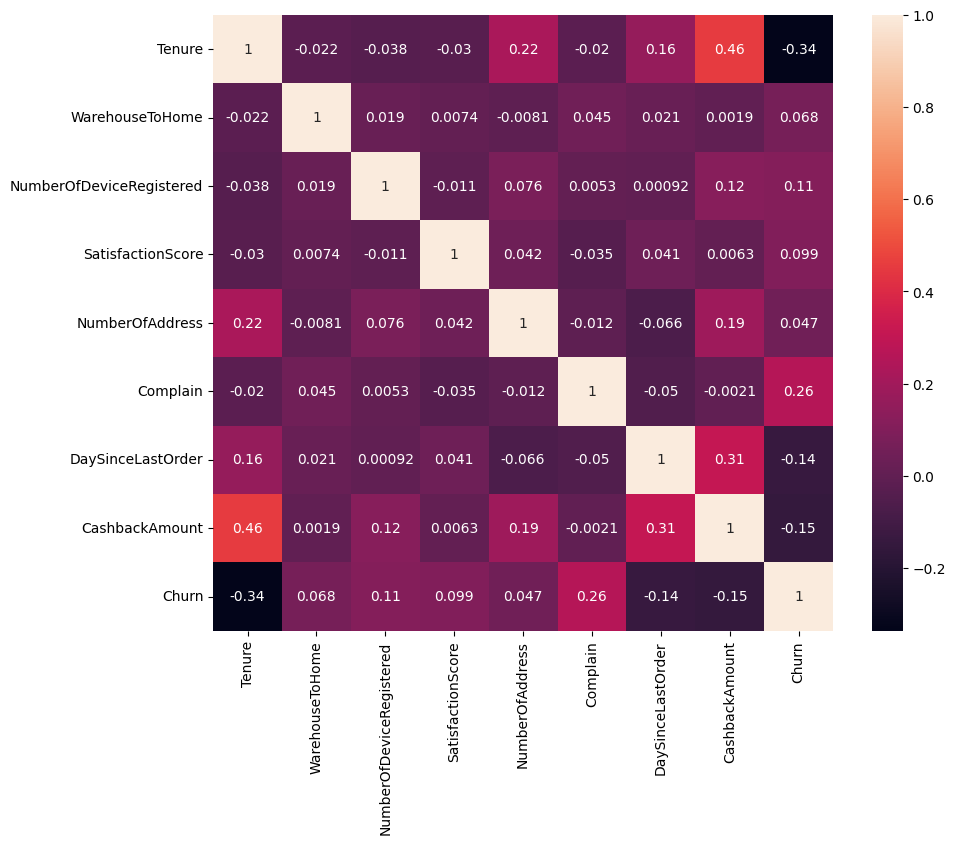

In [149]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)
plt.show()

Insight
- Dari hasil korelasi antar feature diatas, feature Complain memiliki korelasi positif cukup tinggi pada terhadap target, yaitu dengan nilai korelasi 0.26.
- Feature Tenure memiliki korelasi negatif yang cukup tinggi terhadap target dengan nilai korelasi -0.34.

## Data Preparation

#### New Features & Features Encoding

In [150]:
df.describe()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3268.000000,3268.00000,3268.000000,3268.000000,3268.000000,3268.000000,3268.00000,3268.000000,3268.000000
mean,10.128213,15.44798,3.676561,3.020502,4.223684,0.281824,4.46175,177.419009,0.163097
std,8.439440,8.39746,1.017617,1.395435,2.623706,0.449957,3.60976,49.306112,0.369510
min,0.000000,5.00000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000
25%,3.000000,9.00000,3.000000,2.000000,2.000000,0.000000,2.00000,145.897500,0.000000
50%,9.000000,14.00000,4.000000,3.000000,3.000000,0.000000,3.00000,163.885000,0.000000
75%,15.000000,20.00000,4.000000,4.000000,6.000000,1.000000,7.00000,197.132500,0.000000
max,61.000000,127.00000,6.000000,5.000000,22.000000,1.000000,46.00000,324.990000,1.000000


Dengan menggunakan statistik deskriptif diatas, akan digunakan untuk membuat features baru yang nantinya dijadikan data kategorikal. Features yang nantinya akan dijadikan feature kategorikal baru yaitu WarehouseToHome, CashbackAmount, Tenure.

In [151]:
# Membuat klasifikasi WarehouseToHome menjadi Dekat, Sedang dan Jauh
df['WarehouseToHomeClass'] = np.select([df['WarehouseToHome'] > 20,
                                df['WarehouseToHome'] <= 20,
                                df['WarehouseToHome'] <= 9],
                               ['Dekat', 'Sedang', 'Jauh'])

In [152]:
# Membuat klasifikasi CashbackAmount menjadi Kecil, Sedang dan Besar
df['CashbackAmountClass'] = np.select([df['CashbackAmount'] > 197.132500,
                                df['CashbackAmount'] <= 197.132500,
                                df['CashbackAmount'] <= 145.897500],
                               ['Kecil', 'Sedang', 'Besar'])

In [153]:
# Membuat klasifikasi tenure menjadi Singkat, Sedang dan Lama
df['TenureClass'] = np.select([df['Tenure'] > 15,
                                df['Tenure'] <= 15,
                                df['Tenure'] <= 3],
                               ['Singkat', 'Sedang', 'Lama'])

Karena tidak semua model machine learning dapat menangani data kategorikal, maka kita akan rubah data kategorikal menjadi numerik. Pada step ini akan dilakukan metode encoding, yaitu OrdialEncoding, Ohe-Hot Encoding dan BinaryEncoding 
- Ordinal Encoding dilakukan pada feature dengan kategori ordinal
- One-Hot Encoding dilakukan pada feature MaritalStatus dikarenakan variasi data yang hanya sedikit
- Binary Encoding dilakukan pada feature PreferedOrderCat karena tedapat beberapa variasi data sehingga digunakan binary untuk menghindari banyaknya features yang terbentuk untuk menghindari terjadinya overfitting

In [154]:
# Ordinal Encoding using category_encoder
encoder = ce.OrdinalEncoder(cols='WarehouseToHomeClass', return_df=True,
                           mapping=[{'col':'WarehouseToHomeClass', 
                           'mapping':{
                               None:0, 
                               'Dekat':1, 
                               'Sedang':2, 
                               'Jauh':3}}]
                           ) 
df = encoder.fit_transform(df)

In [155]:
# Ordinal Encoding using category_encoder
encoder = ce.OrdinalEncoder(cols='CashbackAmountClass', return_df=True,
                           mapping=[{'col':'CashbackAmountClass', 
                           'mapping':{
                               None:0, 
                               'Kecil':1, 
                               'Sedang':2, 
                               'Besar':3}}]
                           )
df = encoder.fit_transform(df) 

In [156]:
# Ordinal Encoding using category_encoder
encoder = ce.OrdinalEncoder(cols='TenureClass', return_df=True,
                           mapping=[{'col':'TenureClass', 
                           'mapping':{
                               None:0, 
                               'Singkat':1, 
                               'Sedang':2, 
                               'Lama':3}}]
                           ) 
df = encoder.fit_transform(df)

In [157]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['MaritalStatus']),
    ('binary', ce.BinaryEncoder(), ['PreferedOrderCat'])
], remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(drop='first'),
                                 ['MaritalStatus']),
                                ('binary', BinaryEncoder(),
                                 ['PreferedOrderCat'])])

Mengingat terdapatnya data outliers pada data ini, maka scaller yang digunakan yaitu RobustScaller yang dilakukan pada setiap features numerik yang telah diencoding.

In [158]:
num_col = df.select_dtypes('number').columns
df[num_col] = RobustScaler().fit_transform(df[num_col])
df

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn,WarehouseToHomeClass,CashbackAmountClass,TenureClass
0,0.500000,1.363636,0.0,Laptop & Accessory,0.0,Single,-0.25,0.0,0.8,-0.401386,0.0,-1.0,0.0,0.0
1,-0.166667,1.000000,0.0,Mobile Phone,-1.0,Married,-0.25,0.0,0.8,-0.675222,0.0,-1.0,0.0,0.0
2,1.500000,-0.090909,-1.0,Laptop & Accessory,-1.0,Married,0.50,0.0,0.8,0.090856,0.0,0.0,0.0,-1.0
3,0.916667,1.000000,0.0,Fashion,0.0,Divorced,1.00,0.0,0.0,1.295696,0.0,-1.0,-4.0,-1.0
4,1.750000,0.090909,0.0,Others,0.5,Single,1.25,0.0,1.0,3.089392,0.0,0.0,-4.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3263,1.333333,0.090909,1.0,Fashion,0.5,Married,1.00,0.0,1.0,1.678833,0.0,0.0,-4.0,-1.0
3264,1.416667,-0.636364,0.0,Grocery,-1.0,Married,0.25,0.0,1.2,2.578413,0.0,0.0,-4.0,-1.0
3265,1.583333,-0.454545,1.0,Fashion,0.0,Married,1.25,0.0,-0.4,1.326730,0.0,0.0,-4.0,-1.0
3266,-0.083333,-0.636364,-2.0,Mobile Phone,-0.5,Single,0.25,0.0,0.2,-0.118766,0.0,0.0,0.0,0.0


#### Separating Train and Test Set

In [159]:
# Separate feature and target
X = df.drop(columns=["Churn"])
y = df["Churn"]

In [160]:
# Separate train and test set for modelling
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=2020)

# Train and test set dimension
print('Shape of x_train', X_train.shape)
print('Shape of y_train', y_train.shape)
print('Shape of x_test', X_test.shape)
print('Shape of y_test', y_test.shape)

Shape of x_train (2614, 13)
Shape of y_train (2614,)
Shape of x_test (654, 13)
Shape of y_test (654,)


In [161]:
testing = pd.DataFrame(transformer.fit_transform(X_train))

## Modelling & Evaluation

Pada tahap modelling kita akan membandingkan beberapa metode yang nantinya kita akan pilih mana model yang menghasilkan performa terbaik. Model dengan performa terbaik yang nantinya akan kita pilih dalam tahap selanjutnya. Pembuatan model ini kita akan menggunakan beberapa metode dengan parameter defaultnya. Ada 8 metode yang akan kita coba yaitu :
1. LogisticRegression
2. KNeighboursClassifier
3. DecisionTreeClassifier
4. RandomForestClassifier
5. XGBClassifier
6. LGBMClassifier
7. AdaBoostClassifier
8. ExtraTreesClassifier
9. GradientBoostingClassifier
10. BaggingClassifier
11. GaussianNB
12. MLPClassifier
13. CatBoostClassifier


In [178]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier(eval_metric='error')
lgbm = lgb.LGBMClassifier()
abc = AdaBoostClassifier()
etc = ExtraTreesClassifier()
gbc = GradientBoostingClassifier() 
bgc = BaggingClassifier()
nb = GaussianNB()
mlp = MLPClassifier()
catb = CatBoostClassifier(silent=True)


Model Benchmarking : K-Fold

In [179]:
models = [logreg,knn,dt,rf,xgb,lgbm,abc,etc,gbc,bgc,nb,mlp,catb]
score = []
average = []
std_dev = []

for a in models:
    sk_fold = StratifiedKFold(n_splits=5)
    pipeline_model = Pipeline([('preprocess', transformer),('models', a)])
    
    model_cv = cross_val_score(pipeline_model, X_train, y_train,
                               cv=sk_fold, scoring='roc_auc')
    
    score.append([round(i, 2) for i in model_cv])
    average.append(model_cv.mean())
    std_dev.append(model_cv.std())
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM', 'Ada Boost', 'Extra Tree', 'Gradient Boosting', 'Bagging', 'GaussianNB','MLP','CatBoost'],
              'mean roc auc':average,'std_dev':std_dev}).set_index('model').sort_values(by='mean roc auc',ascending=False)

,mean roc auc,std_dev
model,,
Random Forest,0.938127,0.008970
CatBoost,0.933968,0.012583
XGBoost,0.932469,0.009305
LightGBM,0.930995,0.014520
Extra Tree,0.926760,0.009830
Gradient Boosting,0.915940,0.010996
MLP,0.896819,0.013045
Bagging,0.895445,0.016134
Ada Boost,0.893722,0.014445


Dari percobaan yang telah dilakukan pada beberapa metode, dengan menggunakan default hyperparameter. Tabel diatas memperlihatkan bahwa metode RandomForestClassifier dan Cat Boost Classifier memiliki rata-rata skor ROC AUC tertinggi dibandingkan dengan metode-metode yang lain.

Model Bencmarking : Test Data

In [194]:
models = [logreg,knn,dt,rf,xgb,lgbm,abc,etc,gbc,bgc,nb,mlp,catb]
roc_auc = []
fpr = []

for i, a in enumerate(models):    
    pipeline_model = Pipeline([
        ('preprocess', transformer),
        ('model', a)])
    
    pipeline_model.fit(X_train, y_train)
    
    y_pred = pipeline_model.predict(X_test)
    y_pred_proba = pipeline_model.predict_proba(X_test)[:,1]
    confmat_var = confusion_matrix(y_test, y_pred)
    
    roc_auc.append(roc_auc_score(y_test, y_pred_proba))
    fpr.append(confmat_var[0][1]/(confmat_var[0][1]+confmat_var[0][0]))
    print(a,'\n', classification_report(y_test,y_pred))
    
pd.DataFrame(data={'Model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM', 'Ada Boost', 'Extra Tree', 'Gradient Boosting', 'Bagging', 'GaussianNB','MLP','CatBoost'],
                   'ROC AUC Score': roc_auc,'False Positive Rate': fpr}).set_index('Model').sort_values(by='ROC AUC Score',ascending=False)
     


LogisticRegression() 
               precision    recall  f1-score   support

         0.0       0.90      0.97      0.94       547
         1.0       0.77      0.46      0.57       107

    accuracy                           0.89       654
   macro avg       0.83      0.72      0.75       654
weighted avg       0.88      0.89      0.88       654

KNeighborsClassifier() 
               precision    recall  f1-score   support

         0.0       0.89      0.97      0.93       547
         1.0       0.72      0.39      0.51       107

    accuracy                           0.88       654
   macro avg       0.81      0.68      0.72       654
weighted avg       0.86      0.88      0.86       654

DecisionTreeClassifier() 
               precision    recall  f1-score   support

         0.0       0.94      0.94      0.94       547
         1.0       0.68      0.69      0.69       107

    accuracy                           0.90       654
   macro avg       0.81      0.81      0.81       654

,ROC AUC Score,False Positive Rate
Model,,
CatBoost,0.946181,0.027422
Random Forest,0.945839,0.031079
LightGBM,0.945429,0.034735
XGBoost,0.936425,0.042048
Gradient Boosting,0.936134,0.031079
Extra Tree,0.929778,0.029250
Bagging,0.927574,0.036563
Ada Boost,0.909754,0.042048
Logistic Regression,0.902852,0.027422


Setelah melakukan Testing Dataset dengan menggunakan model CatBoostClassifier memiliki performa terbaik dibandingkan dengan metode yang lain pada test data bahkan model RandomForest tergeser tingkat score ROC AUC nya.

Namun perlu dilihat juga bahwa metode Random Forest Classifier (RF) & Cat Boost Classifier (CatBoost) memiliki nilai False Positive Rate (FPR) yang sama sama tinggi yaitu 3,6%. Sedangkan metode Light GBM (LightGBM) dengan nilai False Positive Rate (FPR) sebesar 2,9% merupakan yang terendah diantara metode yang lainnya.

Jika kita bandingkan ketiga metode tersebut (RF, CatBoost, LightGBM) maka metode dengan menggunakan Light GBM merupakan yang paling baik karena memiliki False Positive Rate (FPR) terendah (2,9%) tapi memiliki nilai ROC AUC yang juga tinggi, tidak terlalu jauh dengan metode Random Forest Classifier (RF) & Cat Boost Classifier (CatBoost). Dimana ketiga metode tersebut memiliki nilai ROC AUC sebesar 94% (RF = 94,9%, CatBoost = 94,4%, LightGBM = 94,1%). Tidak lupa juga bahwa nilai Racall metode LightGBM juga merupakan yang tertinggi (69,1%) bersama dengan CatBoost.

Sehingga metode pembuatan model dengan LightGBM adalah yang paling baik diantara metode yang lainnya. Selanjutnya kita akan melakukan test oversampling untuk metode Light GBM (LighGBM) guna melihat apakah kita akan mendapatkan hasil yang lebih baik.


Oversampling with SMOTENC

In [181]:
print(f'Ukuran dataset: {df.shape}')
display(df['Churn'].value_counts())
display((df['Churn'].value_counts()/df.shape[0])*100)

Ukuran dataset: (3268, 14)


0.0    2735
1.0     533
Name: Churn, dtype: int64

0.0    83.69033
1.0    16.30967
Name: Churn, dtype: float64

In [182]:
X = df.drop(columns=["Churn"])
y = df["Churn"]

X_sampling, X_test_sampling, y_sampling, y_test_sampling = train_test_split(X, y, stratify=y, test_size=0.2, random_state=2020)

In [183]:
sampling = SMOTENC(categorical_features=[3, 5], random_state=42)

x_train_sampling, y_train_sampling = sampling.fit_resample(X_sampling, y_sampling)

In [184]:
# training
models = [logreg,knn,dt,rf,xgb,lgbm,abc,etc,gbc,bgc,nb,mlp,catb]
score = []
score_avg = []
std = []
# Training w/ balanced dataset
for a in models:
    sk_fold = StratifiedKFold(n_splits=5)
    pipeline_model = Pipeline([('preprocess', transformer),('model', a)])

    model_cv=cross_val_score(pipeline_model, 
                              x_train_sampling,
                              y_train_sampling,
                              cv=sk_fold,
                              scoring='roc_auc')

    score.append([round(i, 2) for i in model_cv])
    score_avg.append(model_cv.mean())
    std.append(model_cv.std())

print(f'Ukuran data training: {y_train_sampling.shape}')
display(y_train_sampling.value_counts())
display((y_train_sampling.value_counts()/y_train_sampling.shape[0])*100)
pd.DataFrame(data={'Model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM', 'Ada Boost', 'Extra Tree', 'Gradient Boosting', 'Bagging', 'GaussianNB','MLP','CatBoost'],
                   'Mean ROC AUC': score_avg,
                   'Std ROC AUC': std,}).set_index('Model').sort_values(by='Mean ROC AUC',ascending=False)

Ukuran data training: (4376,)


0.0    2188
1.0    2188
Name: Churn, dtype: int64

0.0    50.0
1.0    50.0
Name: Churn, dtype: float64

,Mean ROC AUC,Std ROC AUC
Model,,
XGBoost,0.987590,0.018452
LightGBM,0.987541,0.017514
Random Forest,0.987007,0.010213
CatBoost,0.986988,0.017274
Extra Tree,0.984405,0.011796
Gradient Boosting,0.972964,0.024132
Bagging,0.972458,0.016293
MLP,0.957887,0.015516
KNN,0.952202,0.011598


In [185]:
# Test
models = [logreg,knn,dt,rf,xgb,lgbm,abc,etc,gbc,bgc,nb,mlp,catb]
roc_auc = []
recall = []

for i, a in enumerate(models):    
    pipeline_model = Pipeline([
        ('preprocess', transformer),
        ('model', a)])
    
    pipeline_model.fit(x_train_sampling, y_train_sampling)
    
    y_pred = pipeline_model.predict(X_test_sampling)
    y_pred_proba = pipeline_model.predict_proba(X_test_sampling)[:,1]
    confmat_var = confusion_matrix(y_test_sampling, y_pred)
    
    roc_auc.append(roc_auc_score(y_test_sampling, y_pred_proba))
    recall.append(recall_score(y_test_sampling, y_pred))
    print(a,'\n', classification_report(y_test,y_pred))
    
print(f'Ukuran data testing: {y_test_sampling.shape}')
display(y_test_sampling.value_counts())
display((y_test_sampling.value_counts()/y_test_sampling.shape[0])*100)
    
pd.DataFrame(data={'Model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM', 'Ada Boost', 'Extra Tree', 'Gradient Boosting', 'Bagging', 'GaussianNB','MLP','CatBoost'],
                   'ROC AUC Score': roc_auc, 'Recall Score': recall}).set_index('Model').sort_values(by='ROC AUC Score',ascending=False)

LogisticRegression() 
               precision    recall  f1-score   support

         0.0       0.96      0.82      0.88       547
         1.0       0.46      0.81      0.59       107

    accuracy                           0.81       654
   macro avg       0.71      0.81      0.74       654
weighted avg       0.88      0.81      0.83       654

KNeighborsClassifier() 
               precision    recall  f1-score   support

         0.0       0.94      0.80      0.87       547
         1.0       0.42      0.74      0.54       107

    accuracy                           0.79       654
   macro avg       0.68      0.77      0.70       654
weighted avg       0.86      0.79      0.81       654

DecisionTreeClassifier() 
               precision    recall  f1-score   support

         0.0       0.94      0.92      0.93       547
         1.0       0.62      0.70      0.66       107

    accuracy                           0.88       654
   macro avg       0.78      0.81      0.79       654

0.0    547
1.0    107
Name: Churn, dtype: int64

0.0    83.639144
1.0    16.360856
Name: Churn, dtype: float64

,ROC AUC Score,Recall Score
Model,,
Random Forest,0.943225,0.728972
XGBoost,0.942900,0.757009
LightGBM,0.938355,0.738318
CatBoost,0.937945,0.728972
Extra Tree,0.922867,0.738318
Gradient Boosting,0.919971,0.738318
MLP,0.907618,0.785047
Bagging,0.904244,0.728972
Ada Boost,0.901912,0.738318


Undersampling with Random Undersampling

In [186]:
# training
models = [logreg,knn,dt,rf,xgb,lgbm,abc,etc,gbc,bgc,nb,mlp,catb]
score = []
score_avg = []
std = []

sampling = RandomUnderSampler(sampling_strategy='majority')

x_train_sampling, y_train_sampling = sampling.fit_resample(X_sampling, y_sampling)
# Training w/ balanced dataset
for a in models:
    sk_fold = StratifiedKFold(n_splits=5)
    pipeline_model = Pipeline([('preprocess', transformer),('model', a)])

    model_cv=cross_val_score(pipeline_model, 
                              x_train_sampling,
                              y_train_sampling,
                              cv=sk_fold,
                              scoring='roc_auc')

    score.append([round(i, 2) for i in model_cv])
    score_avg.append(model_cv.mean())
    std.append(model_cv.std())

print(f'Ukuran data training: {y_train_sampling.shape}')
display(y_train_sampling.value_counts())
display((y_train_sampling.value_counts()/y_train_sampling.shape[0])*100)

pd.DataFrame(data={'Model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM', 'Ada Boost', 'Extra Tree', 'Gradient Boosting', 'Bagging', 'GaussianNB','MLP','CatBoost'],
                   'Mean ROC AUC': score_avg,
                   'Std ROC AUC': std,}).set_index('Model').sort_values(by='Mean ROC AUC',ascending=False)

Ukuran data training: (852,)


0.0    426
1.0    426
Name: Churn, dtype: int64

0.0    50.0
1.0    50.0
Name: Churn, dtype: float64

,Mean ROC AUC,Std ROC AUC
Model,,
Random Forest,0.919717,0.025379
CatBoost,0.918215,0.027048
Extra Tree,0.912831,0.019264
LightGBM,0.912295,0.020732
XGBoost,0.906657,0.018377
Gradient Boosting,0.897408,0.028021
Bagging,0.893373,0.029388
Ada Boost,0.878828,0.026055
MLP,0.876306,0.028289


In [195]:
# Test
models = [logreg,knn,dt,rf,xgb,lgbm,abc,etc,gbc,bgc,nb,mlp,catb]
roc_auc = []
recall = []
fpr = []

for i, a in enumerate(models):    
    pipeline_model = Pipeline([
        ('preprocess', transformer),
        ('model', a)])
    
    pipeline_model.fit(x_train_sampling, y_train_sampling)
    
    y_pred = pipeline_model.predict(X_test_sampling)
    y_pred_proba = pipeline_model.predict_proba(X_test_sampling)[:,1]
    confus_matrix_var = confusion_matrix(y_test_sampling, y_pred)
    
    roc_auc.append(roc_auc_score(y_test_sampling, y_pred_proba))
    recall.append(recall_score(y_test_sampling, y_pred))
    fpr.append(confus_matrix_var[0][1]/(confus_matrix_var[0][1]+confus_matrix_var[0][0]))
    print(a,'\n', classification_report(y_test,y_pred))
    
print(f'Ukuran data testing: {y_test_sampling.shape}')
display(y_test_sampling.value_counts())
display((y_test_sampling.value_counts()/y_test_sampling.shape[0])*100)
    
pd.DataFrame(data={'Model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM', 'Ada Boost', 'Extra Tree', 'Gradient Boosting', 'Bagging', 'GaussianNB','MLP','CatBoost'],
                   'ROC AUC Score': roc_auc, 'Recall Score': recall,'False Positive Rate': fpr}).set_index('Model').sort_values(by='ROC AUC Score',ascending=False)

LogisticRegression() 
               precision    recall  f1-score   support

         0.0       0.96      0.79      0.87       547
         1.0       0.44      0.83      0.57       107

    accuracy                           0.80       654
   macro avg       0.70      0.81      0.72       654
weighted avg       0.87      0.80      0.82       654

KNeighborsClassifier() 
               precision    recall  f1-score   support

         0.0       0.94      0.74      0.83       547
         1.0       0.37      0.77      0.50       107

    accuracy                           0.75       654
   macro avg       0.65      0.75      0.66       654
weighted avg       0.85      0.75      0.78       654

DecisionTreeClassifier() 
               precision    recall  f1-score   support

         0.0       0.96      0.78      0.86       547
         1.0       0.42      0.82      0.56       107

    accuracy                           0.79       654
   macro avg       0.69      0.80      0.71       654

0.0    547
1.0    107
Name: Churn, dtype: int64

0.0    83.639144
1.0    16.360856
Name: Churn, dtype: float64

,ROC AUC Score,Recall Score,False Positive Rate
Model,,,
CatBoost,0.929949,0.878505,0.155393
LightGBM,0.929642,0.859813,0.149909
Random Forest,0.928198,0.850467,0.151737
Gradient Boosting,0.922500,0.869159,0.171846
XGBoost,0.919288,0.878505,0.157221
Bagging,0.914470,0.841121,0.157221
Extra Tree,0.913949,0.869159,0.168190
Logistic Regression,0.899264,0.831776,0.210238
Ada Boost,0.896949,0.813084,0.195612


Dapat disimpulkan bahwa model yang setelah di undersampling memiliki recall dari kedua class yang lebih seimbang. Oleh karena itu untuk kasus kali ini, kita menggunakan model yang menggunakan undersampling.

#### Hyperparameter Tuning

CatBoost Classifier

Untuk meningkatkan performansi model (ROC AUC, Recall, FPR), kita akan melakukan hyperparameter tuning untuk model Cat Boost dengan 3 hyperparameter n_estimators, max_depth, learning_rate.

In [213]:
model_catboost = CatBoostClassifier(silent=True)
hyperparam_space_catboost=[{
    'model__n_estimators' : [100, 200, 300, 400, 500],
    'model__max_depth': [i for i in range(5, 10)],
    'model__learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5],}]

In [214]:
rus = RandomUnderSampler(sampling_strategy='majority', random_state=2022)
X_train_fin, y_train_fin = rus.fit_resample(X_train, y_train)

estimator = Pipeline([
    ('preprocess', transformer),
    ('model', model_catboost)])

In [215]:
grid = GridSearchCV(estimator, 
                    n_jobs=-1, 
                    param_grid=hyperparam_space_catboost, 
                    scoring='roc_auc', 
                    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42))

grid.fit(X_train_fin, y_train_fin)
print(f'Best score: {grid.best_score_}')
print(f'Best params: {grid.best_params_}')

Best score: 0.9311003460207614
Best params: {'model__learning_rate': 0.1, 'model__max_depth': 8, 'model__n_estimators': 200}


In [216]:
# Default Model
default_model = Pipeline([
    ('preprocess', transformer),
    ('model', model_catboost)
])
default_model.fit(X_train_fin, y_train_fin)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['MaritalStatus']),
                                                 ('binary', BinaryEncoder(),
                                                  ['PreferedOrderCat'])])),
                ('model',
                 <catboost.core.CatBoostClassifier object at 0x000001B0AF45A350>)])

In [217]:
best_model = grid.best_estimator_
best_model.fit(X_train_fin, y_train_fin)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['MaritalStatus']),
                                                 ('binary', BinaryEncoder(),
                                                  ['PreferedOrderCat'])])),
                ('model',
                 <catboost.core.CatBoostClassifier object at 0x000001B0AF45BB80>)])

In [218]:
# Testing
y_pred_default = default_model.predict(X_test)
y_pred_proba_default = default_model.predict_proba(X_test)

y_pred_tuned = best_model.predict(X_test)
y_pred_proba_tuned = best_model.predict_proba(X_test)

roc_auc_default = roc_auc_score(y_test, y_pred_proba_default[:,1])
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned[:,1])

recall_default = recall_score(y_test, y_pred_default)
recall_tuned = recall_score(y_test, y_pred_tuned)

con_mat_default = confusion_matrix(y_test, y_pred_default)
con_mat_tuned = confusion_matrix(y_test, y_pred_tuned)

fpr_default = con_mat_default[0][1]/(con_mat_default[0][1]+con_mat_default[0][0])
fpr_tuned = con_mat_tuned[0][1]/(con_mat_tuned[0][1]+con_mat_tuned[0][0])

display(pd.DataFrame(data={'Recall': [recall_default, recall_tuned],
                           'FPR': [fpr_default, fpr_tuned],
                           'ROC AUC': [roc_auc_default, roc_auc_tuned]},
                     index=['Default Model', 'Tuned Model']))

print('ROC AUC Score Default: \n', con_mat_default)
print('\nROC AUC Score Tuned: \n', con_mat_tuned)

,Recall,FPR,ROC AUC
Default Model,0.859813,0.160878,0.926532
Tuned Model,0.897196,0.149909,0.923798


ROC AUC Score Default: 
 [[459  88]
 [ 15  92]]

ROC AUC Score Tuned: 
 [[465  82]
 [ 11  96]]


In [219]:
report_default = classification_report(y_test, y_pred_default)
report_tuned = classification_report(y_test, y_pred_tuned)

print('Classification Report Default Model: \n', report_default)
print('Classification Report Tuned Model: \n', report_tuned)

Classification Report Default Model: 
               precision    recall  f1-score   support

         0.0       0.97      0.84      0.90       547
         1.0       0.51      0.86      0.64       107

    accuracy                           0.84       654
   macro avg       0.74      0.85      0.77       654
weighted avg       0.89      0.84      0.86       654

Classification Report Tuned Model: 
               precision    recall  f1-score   support

         0.0       0.98      0.85      0.91       547
         1.0       0.54      0.90      0.67       107

    accuracy                           0.86       654
   macro avg       0.76      0.87      0.79       654
weighted avg       0.91      0.86      0.87       654



Light GBM

In [224]:
model_lgbm = lgb.LGBMClassifier()

hyperparam_space_lgbm=[{
    'model__max_bin': [255, 275, 300, 230],
    'model__num_leaves':[31, 21, 41, 51],
    'model__min_data_in_leaf': [20, 15, 30, 40],
    'model__num_iterations':[100,75, 125, 150],
    'model__learning_rate': [0.1, 0.075, 0.125, 0.05],
    'model__random_state': [42]}]

In [225]:
rus = RandomUnderSampler(sampling_strategy='majority', random_state=2022)
X_train_fin, y_train_fin = rus.fit_resample(X_train, y_train)

estimator = Pipeline([
    ('preprocess', transformer),
    ('model', model_lgbm)])

In [226]:
grid = GridSearchCV(estimator, 
                    n_jobs=-1, 
                    param_grid=hyperparam_space_lgbm, 
                    scoring='roc_auc', 
                    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42))

grid.fit(X_train_fin, y_train_fin)
print(f'Best score: {grid.best_score_}')
print(f'Best params: {grid.best_params_}')

[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
Best score: 0.9264711942105128
Best params: {'model__learning_rate': 0.125, 'model__max_bin': 255, 'model__min_data_in_leaf': 15, 'model__num_iterations': 75, 'model__num_leaves': 51, 'model__random_state': 42}


In [232]:
default_model = Pipeline([
    ('preprocess', transformer),
    ('model', model_lgbm)
])
default_model.fit(X_train_fin, y_train_fin)
best_model = grid.best_estimator_
best_model.fit(X_train_fin, y_train_fin)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['MaritalStatus']),
                                                 ('binary', BinaryEncoder(),
                                                  ['PreferedOrderCat'])])),
                ('model',
                 LGBMClassifier(learning_rate=0.125, max_bin=255,
                                min_data_in_leaf=15, num_iterations=75,
                                num_leaves=51, random_state=42))])

In [228]:
# Testing
y_pred_default = default_model.predict(X_test)
y_pred_proba_default = default_model.predict_proba(X_test)

y_pred_tuned = best_model.predict(X_test)
y_pred_proba_tuned = best_model.predict_proba(X_test)

roc_auc_default = roc_auc_score(y_test, y_pred_proba_default[:,1])
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned[:,1])

recall_default = recall_score(y_test, y_pred_default)
recall_tuned = recall_score(y_test, y_pred_tuned)

con_mat_default = confusion_matrix(y_test, y_pred_default)
con_mat_tuned = confusion_matrix(y_test, y_pred_tuned)

fpr_default = con_mat_default[0][1]/(con_mat_default[0][1]+con_mat_default[0][0])
fpr_tuned = con_mat_tuned[0][1]/(con_mat_tuned[0][1]+con_mat_tuned[0][0])

display(pd.DataFrame(data={'Recall': [recall_default, recall_tuned],
                           'FPR': [fpr_default, fpr_tuned],
                           'ROC AUC': [roc_auc_default, roc_auc_tuned]},
                     index=['Default Model', 'Tuned Model']))

print('ROC AUC Score Default: \n', con_mat_default)
print('\nROC AUC Score Tuned: \n', con_mat_tuned)

,Recall,FPR,ROC AUC
Default Model,0.850467,0.159049,0.908046
Tuned Model,0.841121,0.162706,0.918365


ROC AUC Score Default: 
 [[460  87]
 [ 16  91]]

ROC AUC Score Tuned: 
 [[458  89]
 [ 17  90]]


In [229]:
report_default = classification_report(y_test, y_pred_default)
report_tuned = classification_report(y_test, y_pred_tuned)

print('Classification Report Default Model: \n', report_default)
print('Classification Report Tuned Model: \n', report_tuned)

Classification Report Default Model: 
               precision    recall  f1-score   support

         0.0       0.97      0.84      0.90       547
         1.0       0.51      0.85      0.64       107

    accuracy                           0.84       654
   macro avg       0.74      0.85      0.77       654
weighted avg       0.89      0.84      0.86       654

Classification Report Tuned Model: 
               precision    recall  f1-score   support

         0.0       0.96      0.84      0.90       547
         1.0       0.50      0.84      0.63       107

    accuracy                           0.84       654
   macro avg       0.73      0.84      0.76       654
weighted avg       0.89      0.84      0.85       654



## Conclusion & Recommendation